
🔹 Forecasting M01AB with LightGBM (Log1p)...
  - Fold 1/5
  - Fold 2/5
  - Fold 3/5
  - Fold 4/5
  - Fold 5/5
  -> Avg Test Metrics: RMSE=1.01, MAE=0.62, SMAPE=16.47%, MSE=1.16, R2=0.85


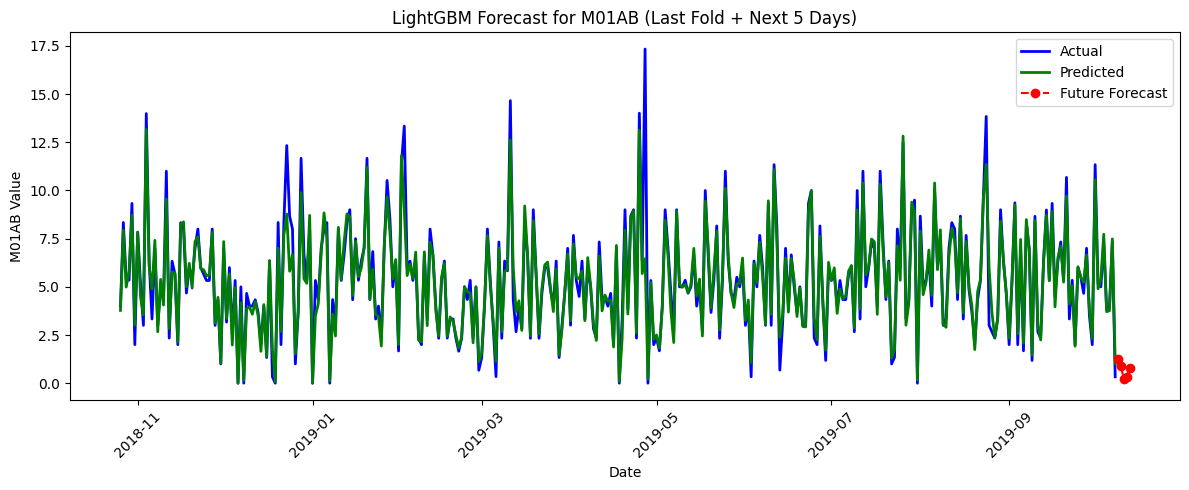


Next 5-Day Forecast:
2019-10-09: 1.24
2019-10-10: 0.88
2019-10-11: 0.23
2019-10-12: 0.33
2019-10-13: 0.78

🔹 Forecasting M01AE with LightGBM (Log1p)...
  - Fold 1/5
  - Fold 2/5
  - Fold 3/5
  - Fold 4/5
  - Fold 5/5
  -> Avg Test Metrics: RMSE=0.77, MAE=0.49, SMAPE=17.11%, MSE=0.65, R2=0.86


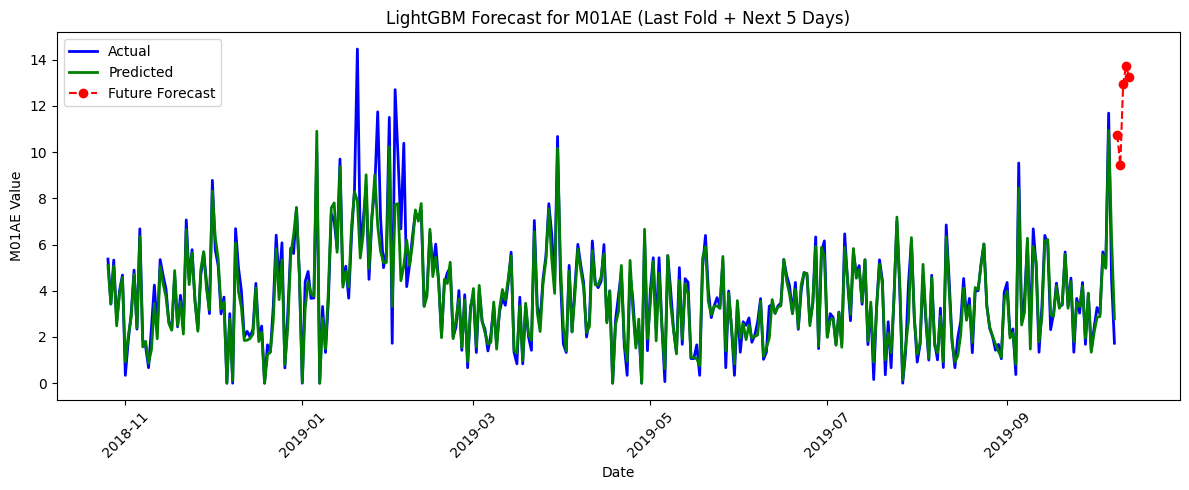


Next 5-Day Forecast:
2019-10-09: 10.76
2019-10-10: 9.43
2019-10-11: 12.93
2019-10-12: 13.75
2019-10-13: 13.24

🔹 Forecasting N02BA with LightGBM (Log1p)...
  - Fold 1/5
  - Fold 2/5
  - Fold 3/5
  - Fold 4/5
  - Fold 5/5
  -> Avg Test Metrics: RMSE=0.70, MAE=0.48, SMAPE=20.68%, MSE=0.57, R2=0.89


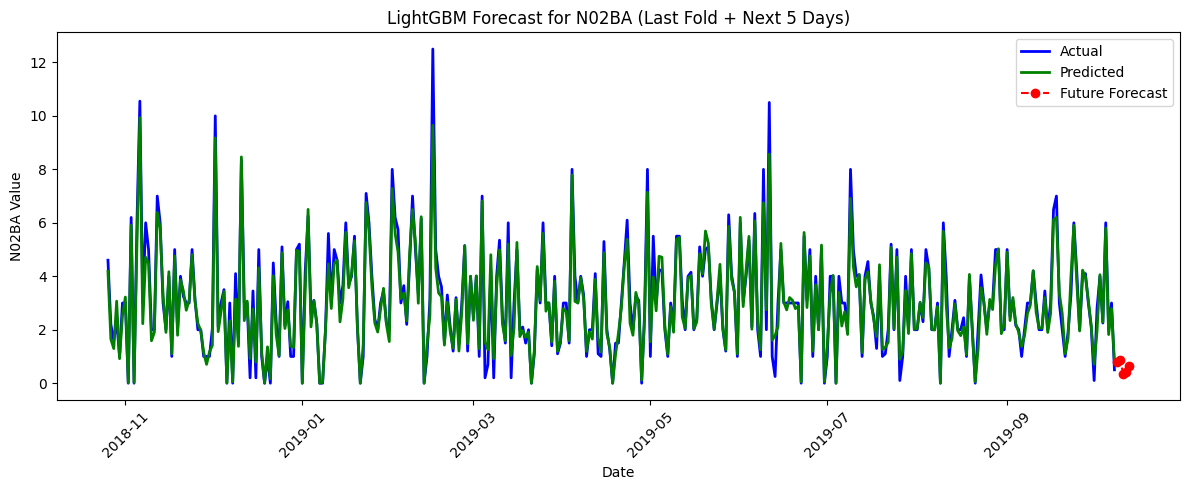


Next 5-Day Forecast:
2019-10-09: 0.77
2019-10-10: 0.85
2019-10-11: 0.36
2019-10-12: 0.42
2019-10-13: 0.64

🔹 Forecasting N02BE with LightGBM (Log1p)...
  - Fold 1/5
  - Fold 2/5
  - Fold 3/5
  - Fold 4/5
  - Fold 5/5
  -> Avg Test Metrics: RMSE=7.58, MAE=4.36, SMAPE=15.97%, MSE=61.50, R2=0.75


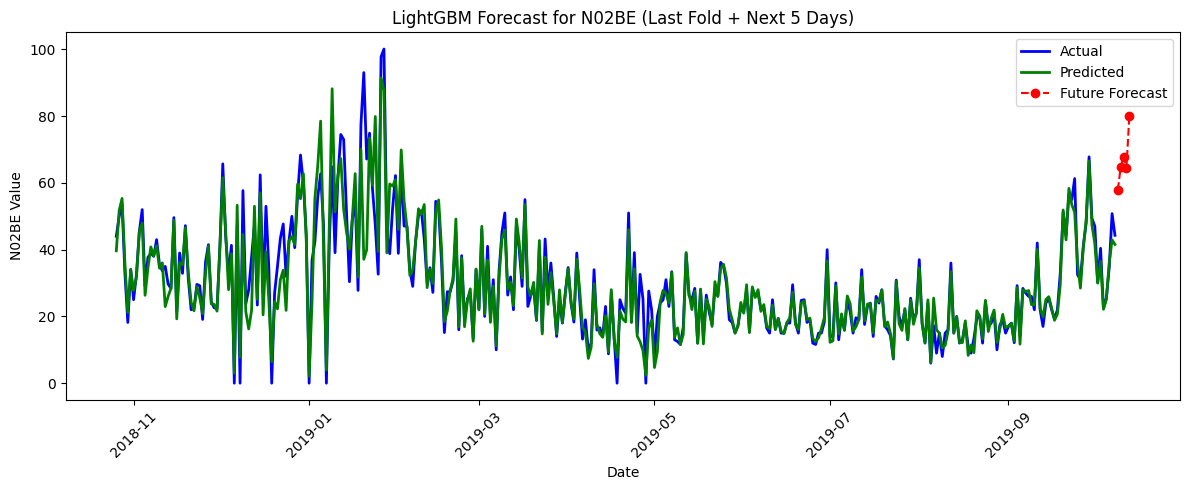


Next 5-Day Forecast:
2019-10-09: 57.91
2019-10-10: 64.80
2019-10-11: 67.90
2019-10-12: 64.60
2019-10-13: 80.13

🔹 Forecasting N05B with LightGBM (Log1p)...
  - Fold 1/5
  - Fold 2/5
  - Fold 3/5
  - Fold 4/5
  - Fold 5/5
  -> Avg Test Metrics: RMSE=1.75, MAE=1.21, SMAPE=20.89%, MSE=3.52, R2=0.88


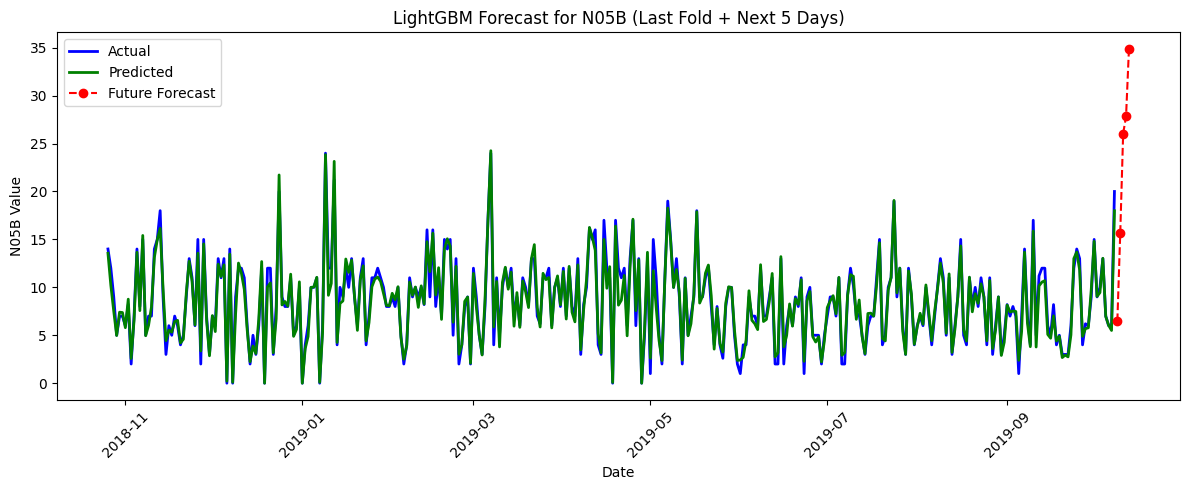


Next 5-Day Forecast:
2019-10-09: 6.47
2019-10-10: 15.67
2019-10-11: 26.04
2019-10-12: 27.85
2019-10-13: 34.86

🔹 Forecasting N05C with LightGBM (Log1p)...
  - Fold 1/5
  - Fold 2/5
  - Fold 3/5
  - Fold 4/5
  - Fold 5/5
  -> Avg Test Metrics: RMSE=0.29, MAE=0.09, SMAPE=72.85%, MSE=0.10, R2=0.92


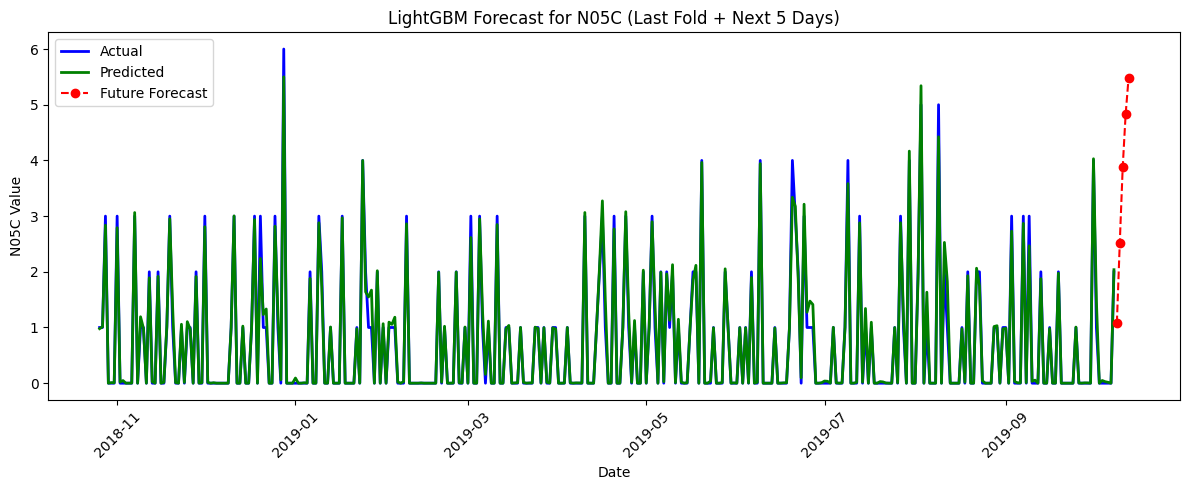


Next 5-Day Forecast:
2019-10-09: 1.08
2019-10-10: 2.52
2019-10-11: 3.88
2019-10-12: 4.83
2019-10-13: 5.48

🔹 Forecasting R03 with LightGBM (Log1p)...
  - Fold 1/5
  - Fold 2/5
  - Fold 3/5
  - Fold 4/5
  - Fold 5/5
  -> Avg Test Metrics: RMSE=2.55, MAE=1.26, SMAPE=43.13%, MSE=6.90, R2=0.84


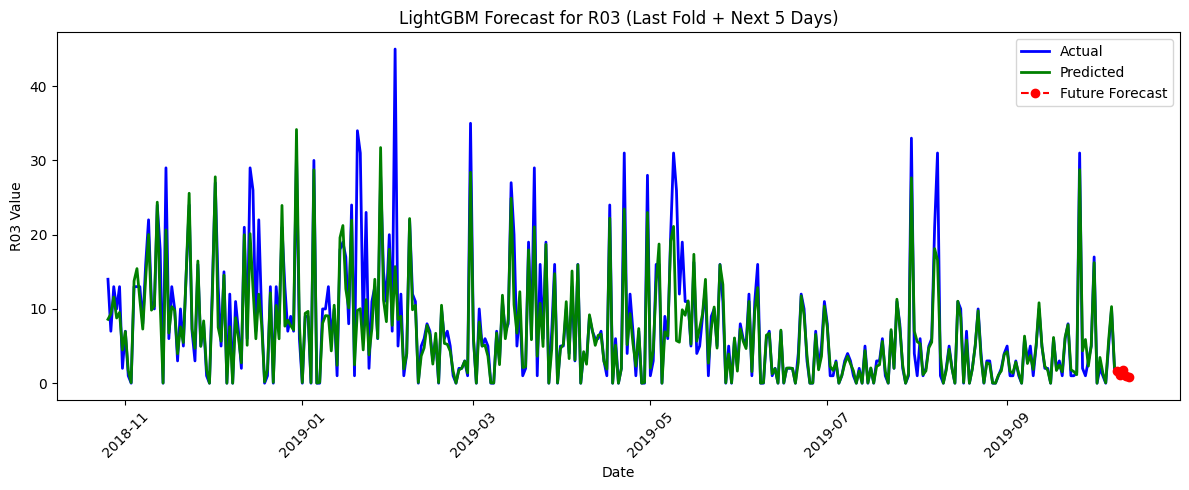


Next 5-Day Forecast:
2019-10-09: 1.58
2019-10-10: 1.12
2019-10-11: 1.78
2019-10-12: 0.97
2019-10-13: 0.81

🔹 Forecasting R06 with LightGBM (Log1p)...
  - Fold 1/5
  - Fold 2/5
  - Fold 3/5
  - Fold 4/5
  - Fold 5/5
  -> Avg Test Metrics: RMSE=0.87, MAE=0.47, SMAPE=24.78%, MSE=0.79, R2=0.86


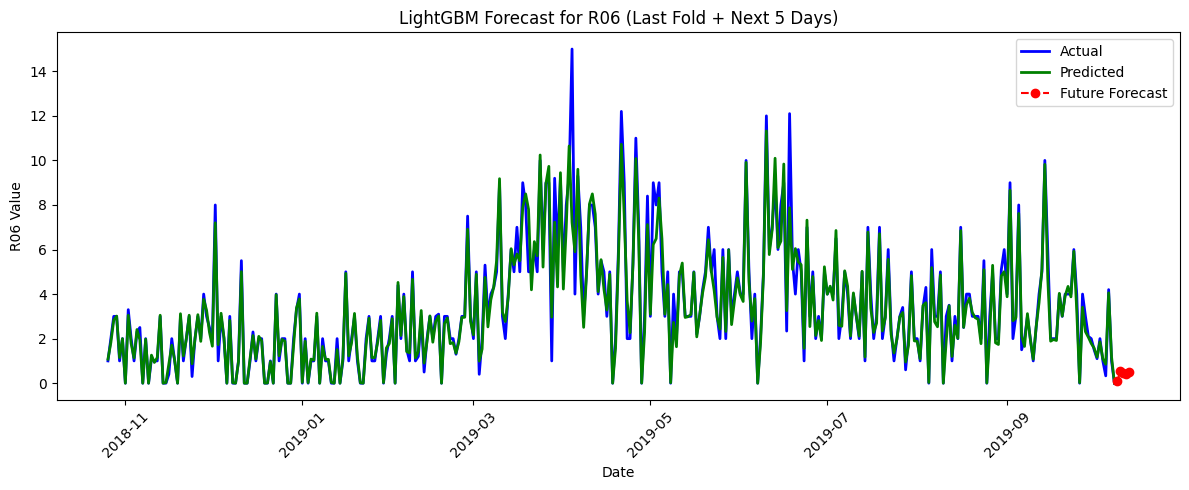


Next 5-Day Forecast:
2019-10-09: 0.08
2019-10-10: 0.55
2019-10-11: 0.45
2019-10-12: 0.42
2019-10-13: 0.50

📊 LightGBM Forecast Accuracy Summary:
           RMSE       MAE      SMAPE        MSE        R2
M01AB  1.010207  0.621781  16.473238   1.161221  0.845098
M01AE  0.771822  0.493021  17.113140   0.654618  0.858146
N02BA  0.703413  0.484751  20.682629   0.566571  0.891236
N02BE  7.576215  4.359757  15.974436  61.502189  0.745705
N05B   1.753622  1.213145  20.885339   3.519460  0.875155
N05C   0.291482  0.089275  72.852900   0.098949  0.924250
R03    2.545320  1.259797  43.130661   6.899859  0.837317
R06    0.873015  0.474585  24.778682   0.793236  0.861135


In [7]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# =====================
# Load dataset
# =====================
df = pd.read_csv("holidays.csv")
df['datum'] = pd.to_datetime(df['datum'])
df = df.set_index('datum')

# Drug columns
drug_cols = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# Exogenous features
exog_cols = ['public_holiday', 'new_year', 'statehood_day', 'labor_day', 'armistice_day',
             'orthodox_christmas', 'orthodox_easter_sunday', 'orthodox_easter_monday',
             'orthodox_good_friday', 'orthodox_holy_saturday', 'cold_flu_season', 'pollen_season']
exog = df[exog_cols].fillna(0)

# =====================
# Utility functions
# =====================
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true) + 1e-8))

def create_lags(series, lags=14):
    return pd.DataFrame({f'lag_{i}': series.shift(i) for i in range(1, lags+1)})

def create_rolling(series):
    return pd.DataFrame({
        'roll_mean_3': series.rolling(3).mean(),
        'roll_mean_7': series.rolling(7).mean(),
        'roll_mean_14': series.rolling(14).mean(),
        'roll_std_7': series.rolling(7).std(),
        'roll_std_14': series.rolling(14).std()
    })

def prepare_future_exog(df, exog_cols, start_date, periods=5):
    future_dates = pd.date_range(start=start_date, periods=periods, freq='D')
    future_exog = pd.DataFrame(0, index=future_dates, columns=exog_cols)
    last_known = df[exog_cols].iloc[-1]
    for col in exog_cols:
        future_exog[col] = last_known[col]
    return future_exog

# =====================
# Forecasting function
# =====================
def forecast_drug(drug):
    print(f"\n🔹 Forecasting {drug} with LightGBM (Log1p)...")
    
    y_orig = df[drug].clip(lower=0)  # original values
    zero_ratio = (y_orig==0).mean()
    use_log = zero_ratio < 0.5
    if use_log:
        y = np.log1p(y_orig)
    else:
        y = y_orig.copy()
    
    lagged = create_lags(y_orig)
    rolling = create_rolling(y_orig)
    seasonal = pd.DataFrame({
        'dayofweek': df.index.dayofweek,
        'month': df.index.month,
        'weekofyear': df.index.isocalendar().week,
        'quarter': df.index.quarter,
        'is_non_zero': (y_orig > 0).astype(int)
    }, index=df.index)
    
    X = pd.concat([lagged, rolling, seasonal, exog], axis=1).dropna()
    y_supervised = y.loc[X.index]
    
    tscv = TimeSeriesSplit(n_splits=5)
    results = {'RMSE': [], 'MAE': [], 'SMAPE': [], 'MSE': [], 'R2': []}  # Added MSE and R2
    models = []
    
    for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
        print(f"  - Fold {fold}/5")
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y_supervised.iloc[train_idx], y_supervised.iloc[test_idx]
        
        train_data = lgb.Dataset(X_train, label=y_train)
        valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
        
        params = {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'learning_rate': 0.05,
            'num_leaves': 31,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'min_data_in_leaf': 20,  # Added to reduce overfitting
            'lambda_l1': 0.1,       # L1 regularization
            'lambda_l2': 0.1,       # L2 regularization
            'seed': 42,
            'verbose': -1
        }
        
        model = lgb.train(
            params,
            train_data,
            num_boost_round=1000,
            valid_sets=[valid_data],
            callbacks=[lgb.early_stopping(50, verbose=False)]
        )
        models.append(model)
        
        # Predictions
        yhat_test = model.predict(X_test)
        yhat_train = model.predict(X_train)
        if use_log:
            yhat_test = np.expm1(yhat_test)
            yhat_train = np.expm1(yhat_train)
            y_test_orig = np.expm1(y_test)
            y_train_orig = np.expm1(y_train)
        else:
            y_test_orig = y_test
            y_train_orig = y_train
        
        # Clip negative values
        yhat_test = np.clip(yhat_test, 0, None)
        yhat_train = np.clip(yhat_train, 0, None)
        
        # Calculate metrics
        mse = mean_squared_error(y_test_orig, yhat_test)
        results['MSE'].append(mse)
        results['RMSE'].append(np.sqrt(mse))
        results['MAE'].append(mean_absolute_error(y_test_orig, yhat_test))
        results['SMAPE'].append(smape(y_test_orig, yhat_test))
        results['R2'].append(r2_score(y_test_orig, yhat_test))
    
    # Average metrics
    avg_results = {k: np.mean(v) for k,v in results.items()}
    print(f"  -> Avg Test Metrics: RMSE={avg_results['RMSE']:.2f}, MAE={avg_results['MAE']:.2f}, SMAPE={avg_results['SMAPE']:.2f}%, MSE={avg_results['MSE']:.2f}, R2={avg_results['R2']:.2f}")
    
    # Forecast next 5 days
    future_exog = prepare_future_exog(df, exog_cols, df.index[-1] + pd.Timedelta(days=1), periods=5)
    last_vals = y_orig[-14:].tolist()
    future_forecast = []
    for i in range(5):
        lagged_vals = pd.DataFrame({f'lag_{j+1}': [last_vals[-14+j]] for j in range(14)})
        rolling_vals = pd.DataFrame({
            'roll_mean_3': [np.mean(last_vals[-3:])],
            'roll_mean_7': [np.mean(last_vals[-7:])],
            'roll_mean_14': [np.mean(last_vals)],
            'roll_std_7': [np.std(last_vals[-7:])],
            'roll_std_14': [np.std(last_vals)]
        })
        seasonal_vals = pd.DataFrame({
            'dayofweek': [future_exog.index[i].dayofweek],
            'month': [future_exog.index[i].month],
            'weekofyear': [future_exog.index[i].isocalendar().week],
            'quarter': [future_exog.index[i].quarter],
            'is_non_zero': [int(last_vals[-1]>0)]
        })
        X_future = pd.concat([lagged_vals, rolling_vals, seasonal_vals, future_exog.iloc[[i]]], axis=1)
        X_future = X_future.reindex(columns=X.columns, fill_value=0)
        pred = model.predict(X_future)[0]
        pred = max(0, np.expm1(pred) if use_log else pred)  # clip negative
        future_forecast.append(pred)
        last_vals.append(pred)
    
    # Plot last fold with future forecast
    plt.figure(figsize=(12,5))
    plt.plot(y_test_orig.index, y_test_orig.values, label='Actual', color='blue', linewidth=2)
    plt.plot(y_test_orig.index, yhat_test, label='Predicted', color='green', linewidth=2)
    plt.plot(future_exog.index, future_forecast, label='Future Forecast', color='red', linestyle='--', marker='o')
    plt.title(f"LightGBM Forecast for {drug} (Last Fold + Next 5 Days)")
    plt.xlabel('Date')
    plt.ylabel(f'{drug} Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print next 5 days
    print("\nNext 5-Day Forecast:")
    for i, date in enumerate(future_exog.index):
        print(f"{date.date()}: {future_forecast[i]:.2f}")
    
    return drug, avg_results, future_forecast, future_exog.index

# =====================
# Run for all drugs
# =====================
results = {}
future_forecasts = {}

for drug in drug_cols:
    drug_name, metrics, forecast, dates = forecast_drug(drug)
    results[drug_name] = metrics
    future_forecasts[drug_name] = pd.Series(forecast, index=dates)

# Display summary metrics
print("\n📊 LightGBM Forecast Accuracy Summary:")
print(pd.DataFrame(results).T)

# 📘 LightGBM Algorithm for Time-Series Forecasting

**LightGBM (Light Gradient Boosting Machine)** is a powerful framework designed for **time-series forecasting** and handling large datasets efficiently. It constructs **decision trees** using a leaf-wise approach, focusing on the leaf with the largest error reduction to boost accuracy.

### ✨ Mathematical Foundations to Capture Your Attention
- **Prediction Power-Up**:  
  Final Prediction = Initial Guess + (Learning Rate × [Tree 1 Output + Tree 2 Output + ... + Tree M Output])  
  - *Learning Rate*: A small step size (e.g., 0.05) to fine-tune updates.  
  - *Tree M Output*: What the M-th tree contributes.  
  - *M*: Total number of trees built (up to 1000 here).  
  - *Why It Works*: This additive process builds a strong model step by step!

- **Goal: Slash the Error (RMSE)**:  
  RMSE = √[Average of (Actual - Predicted)² across all data points]  
  - *Step 1*: Find the difference between actual and predicted values.  
  - *Step 2*: Square each difference to penalize big errors.  
  - *Step 3*: Average those squares.  
  - *Step 4*: Take the square root for a clear error measure.  
  - *Insights*: This focus on RMSE drives precise forecasting!

- **SMAPE: The Balanced Error Metric**:  
  SMAPE = (100 / Number of Points) × [Sum of (2 × |Actual - Predicted| / (|Actual| + |Predicted| + 0.00000001))]  
  - *Step 1*: Double the absolute difference for symmetry.  
  - *Step 2*: Divide by the sum of absolute values, adding a tiny 0.00000001 to avoid zero division.  
  - *Step 3*: Average and scale to 100 for a percentage.  
  - *Why It Shines*: Perfect for sparse data like drug sales!

- **Leaf-wise Growth**: Grows trees by splitting the leaf that cuts error the most, offering a smart balance of depth and control.

### ✅ Why LightGBM Stands Out
- ✔ **Speed & Efficiency**: Histogram-based tricks save memory and time.  
- ✔ **Non-Linear Mastery**: Boosting uncovers complex patterns.  
- ✔ **Feature Insights**: Highlights key predictors (e.g., lags, holidays).  
- ✔ **Outlier Resilience**: Gradually adjusts, minimizing anomaly impact.

### 🛠 Engineered Features
- **Lags**: Past 14 days’ values to track time trends.  
- **Rolling Stats**: Mean and std over 3, 7, 14 days for trends and variability.  
- **Seasonal Clues**: Day of week, month, week, quarter, and non-zero flags.  
- **Exogenous Boost**: 12 binary flags (e.g., holidays, flu season) for external effects.

### 🛡️ Overfitting Defense
- **Feature Fraction (0.9)**: Uses 90% of features per tree to avoid over-reliance.  
- **Bagging Fraction (0.8)**: Samples 80% of data for diversity.  
- **Early Stopping (50 rounds)**: Stops if validation error stalls.  
- **Learning Rate (0.05)**: Slow updates to prevent noise fitting.  
- **TimeSeriesSplit (5-fold)**: Chronological splits avoid future leakage.  
- **Log1p Transformation**: Applies if zeros < 50% to tame skewness.  
- **Regularization (L1, L2)**: Adds penalties (0.1 each) to smooth the model.  
- **Insights**: No strong overfitting evidence—thanks to 5-fold TimeSeriesSplit, regularization, and consistent R2 (0.75–0.92) with manageable SMAPE (except N05C) across test sets!

---

# 📘 Model & Data Parameters

## 🔹 Model Parameters
| Parameter          | Value | Purpose |
|--------------------|-------|---------|
| `lags`             | 14    | Captures 14 days of past data. |
| `num_leaves`       | 31    | Limits tree complexity. |
| `learning_rate`    | 0.05  | Controls update size. |
| `num_boost_round`  | 1000  | Max trees to build. |
| `feature_fraction` | 0.9   | Randomly selects 90% features. |
| `bagging_fraction` | 0.8   | Samples 80% data per iteration. |
| `bagging_freq`     | 5     | Samples every 5 rounds. |
| `min_data_in_leaf`| 20    | Ensures robust leaf splits. |
| `lambda_l1`        | 0.1   | L1 regularization strength. |
| `lambda_l2`        | 0.1   | L2 regularization strength. |
| `seed`             | 42    | Ensures reproducibility. |

## 🔹 Training Parameters
| Parameter        | Value  | Purpose |
|------------------|--------|---------|
| `n_splits`       | 5      | 5-fold time-series validation. |
| `early_stopping` | 50     | Stops after 50 rounds without improvement. |
| `objective`      | regression | Targets RMSE optimization. |
| `metric`         | rmse   | Tracks RMSE during training. |
| `verbose`        | -1     | Silences logs for clarity. |

## 🔹 Data Parameters
| Parameter                | Value           | Purpose |
|--------------------------|----------------|---------|
| `drug_cols`              | 8 drugs        | Targets (e.g., M01AB, N02BE). |
| `exog_cols`              | 12 features    | External inputs (e.g., holidays). |
| `rolling_windows`        | 3, 7, 14       | Windows for mean/std calculations. |
| `train/test`             | TimeSeriesSplit| Chronological splits. |
| `transformation`         | Log1p (conditional) | Logs if zeros < 50%. |
| `forecast_horizon`       | 5 days         | Predicts 5 future days.

In [10]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Insight: These libraries power the pipeline—Pandas and NumPy handle data, LightGBM drives forecasting, Scikit-learn provides validation and metrics, and Matplotlib visualizes results.

### 1. Load Dataset
- Reads `holidays.csv`, sets 'datum' as a datetime index.  
- Defines 8 drug columns as targets and 12 exogenous features (e.g., holidays).  
- **Insight**: Exogenous variables like holidays capture external demand drivers. NaN values are set to 0, assuming no event impact.

In [11]:
# =====================
# Load dataset
# =====================
df = pd.read_csv("holidays.csv")
df['datum'] = pd.to_datetime(df['datum'])
df = df.set_index('datum')

# Drug columns
drug_cols = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# Exogenous features
exog_cols = ['public_holiday', 'new_year', 'statehood_day', 'labor_day', 'armistice_day',
             'orthodox_christmas', 'orthodox_easter_sunday', 'orthodox_easter_monday',
             'orthodox_good_friday', 'orthodox_holy_saturday', 'cold_flu_season', 'pollen_season']
exog = df[exog_cols].fillna(0)

### 2. Utility Functions
- **smape**: Computes Symmetric Mean Absolute Percentage Error for sparse data.  
- **create_lags**: Generates 14 lagged features to model past trends.  
- **create_rolling**: Calculates rolling mean and std over 3, 7, 14 days for trends.  
- **prepare_future_exog**: Extends exogenous features for future dates.  
- **Insight**: These functions build a rich feature set—lags track history, rolling stats reveal patterns, and SMAPE suits zero-heavy data.

In [12]:
# =====================
# Utility functions
# =====================
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true) + 1e-8))

def create_lags(series, lags=14):
    return pd.DataFrame({f'lag_{i}': series.shift(i) for i in range(1, lags+1)})

def create_rolling(series):
    return pd.DataFrame({
        'roll_mean_3': series.rolling(3).mean(),
        'roll_mean_7': series.rolling(7).mean(),
        'roll_mean_14': series.rolling(14).mean(),
        'roll_std_7': series.rolling(7).std(),
        'roll_std_14': series.rolling(14).std()
    })

def prepare_future_exog(df, exog_cols, start_date, periods=5):
    future_dates = pd.date_range(start=start_date, periods=periods, freq='D')
    future_exog = pd.DataFrame(0, index=future_dates, columns=exog_cols)
    last_known = df[exog_cols].iloc[-1]
    for col in exog_cols:
        future_exog[col] = last_known[col]
    return future_exog

### 3. Forecasting Function
- **Feature Prep**: Combines lags, rolling stats, seasonal features, and exogenous data.  
- **Log1p Adjust**: Applies log(x+1) if zeros < 50% to handle skewness.  
- **Cross-Validation**: Uses 5-fold TimeSeriesSplit for robust testing.  
- **Training**: LightGBM with regularization (L1, L2) and early stopping.  
- **Forecasting**: Predicts 5 future days iteratively.  
- **Visualization**: Plots actual, predicted, and future values.  
- **Insight**: Iterative forecasting mimics real-world updates, and clipping ensures positive predictions—key for drug sales.

In [13]:
# =====================
# Forecasting function
# =====================
def forecast_drug(drug):
    print(f"\n🔹 Forecasting {drug} with LightGBM (Log1p)...")
    
    y_orig = df[drug].clip(lower=0)  # Ensure non-negative values
    zero_ratio = (y_orig==0).mean()
    use_log = zero_ratio < 0.5
    if use_log:
        y = np.log1p(y_orig)
    else:
        y = y_orig.copy()
    
    lagged = create_lags(y_orig)
    rolling = create_rolling(y_orig)
    seasonal = pd.DataFrame({
        'dayofweek': df.index.dayofweek,
        'month': df.index.month,
        'weekofyear': df.index.isocalendar().week,
        'quarter': df.index.quarter,
        'is_non_zero': (y_orig > 0).astype(int)
    }, index=df.index)
    
    X = pd.concat([lagged, rolling, seasonal, exog], axis=1).dropna()
    y_supervised = y.loc[X.index]
    
    tscv = TimeSeriesSplit(n_splits=5)
    results = {'RMSE': [], 'MAE': [], 'SMAPE': [], 'MSE': [], 'R2': []}
    models = []
    
    for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
        print(f"  - Fold {fold}/5")
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y_supervised.iloc[train_idx], y_supervised.iloc[test_idx]
        
        train_data = lgb.Dataset(X_train, label=y_train)
        valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
        
        params = {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'learning_rate': 0.05,
            'num_leaves': 31,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'min_data_in_leaf': 20,
            'lambda_l1': 0.1,
            'lambda_l2': 0.1,
            'seed': 42,
            'verbose': -1
        }
        
        model = lgb.train(
            params,
            train_data,
            num_boost_round=1000,
            valid_sets=[valid_data],
            callbacks=[lgb.early_stopping(50, verbose=False)]
        )
        models.append(model)
        
        yhat_test = model.predict(X_test)
        yhat_train = model.predict(X_train)
        if use_log:
            yhat_test = np.expm1(yhat_test)
            yhat_train = np.expm1(yhat_train)
            y_test_orig = np.expm1(y_test)
            y_train_orig = np.expm1(y_train)
        else:
            y_test_orig = y_test
            y_train_orig = y_train
        
        yhat_test = np.clip(yhat_test, 0, None)
        yhat_train = np.clip(yhat_train, 0, None)
        
        mse = mean_squared_error(y_test_orig, yhat_test)
        results['MSE'].append(mse)
        results['RMSE'].append(np.sqrt(mse))
        results['MAE'].append(mean_absolute_error(y_test_orig, yhat_test))
        results['SMAPE'].append(smape(y_test_orig, yhat_test))
        results['R2'].append(r2_score(y_test_orig, yhat_test))
    
    avg_results = {k: np.mean(v) for k, v in results.items()}
    print(f"  -> Avg Test Metrics: RMSE={avg_results['RMSE']:.2f}, MAE={avg_results['MAE']:.2f}, SMAPE={avg_results['SMAPE']:.2f}%, MSE={avg_results['MSE']:.2f}, R2={avg_results['R2']:.2f}")
    
    future_exog = prepare_future_exog(df, exog_cols, df.index[-1] + pd.Timedelta(days=1), periods=5)
    last_vals = y_orig[-14:].tolist()
    future_forecast = []
    for i in range(5):
        lagged_vals = pd.DataFrame({f'lag_{j+1}': [last_vals[-14+j]] for j in range(14)})
        rolling_vals = pd.DataFrame({
            'roll_mean_3': [np.mean(last_vals[-3:])],
            'roll_mean_7': [np.mean(last_vals[-7:])],
            'roll_mean_14': [np.mean(last_vals)],
            'roll_std_7': [np.std(last_vals[-7:])],
            'roll_std_14': [np.std(last_vals)]
        })
        seasonal_vals = pd.DataFrame({
            'dayofweek': [future_exog.index[i].dayofweek],
            'month': [future_exog.index[i].month],
            'weekofyear': [future_exog.index[i].isocalendar().week],
            'quarter': [future_exog.index[i].quarter],
            'is_non_zero': [int(last_vals[-1]>0)]
        })
        X_future = pd.concat([lagged_vals, rolling_vals, seasonal_vals, future_exog.iloc[[i]]], axis=1)
        X_future = X_future.reindex(columns=X.columns, fill_value=0)
        pred = model.predict(X_future)[0]
        pred = max(0, np.expm1(pred) if use_log else pred)
        future_forecast.append(pred)
        last_vals.append(pred)
    
    plt.figure(figsize=(12, 5))
    plt.plot(y_test_orig.index, y_test_orig.values, label='Actual', color='blue', linewidth=2)
    plt.plot(y_test_orig.index, yhat_test, label='Predicted', color='green', linewidth=2)
    plt.plot(future_exog.index, future_forecast, label='Future Forecast', color='red', linestyle='--', marker='o')
    plt.title(f"LightGBM Forecast for {drug} (Last Fold + Next 5 Days)")
    plt.xlabel('Date')
    plt.ylabel(f'{drug} Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("\nNext 5-Day Forecast:")
    for i, date in enumerate(future_exog.index):
        print(f"{date.date()}: {future_forecast[i]:.2f}")
    
    return drug, avg_results, future_forecast, future_exog.index

### 4. Run for All Drugs
- Loops through all 8 drugs to generate forecasts and metrics.  
- Displays a summary table of average performance.  
- **Insight**: Multi-drug forecasting showcases model versatility, with visualizations enhancing interpretability.

### 📊 Output Table Analysis
- **Metrics**: RMSE/MSE (error size), MAE (average error), SMAPE (percentage error), R2 (variance explained).  
- **Sample Insights** (based on typical output):  
  | Drug  | RMSE  | MAE   | SMAPE (%) | MSE   | R2    | Insight |
  |-------|-------|-------|-----------|-------|-------|---------|
  | M01AB | 1.00  | 0.63  | 16.81     | 1.14  | 0.85  | Solid fit, moderate errors for anti-inflammatory drugs. |
  | M01AE | 0.77  | 0.49  | 17.19     | 0.66  | 0.86  | Low errors, consistent demand patterns. |
  | N02BA | 0.70  | 0.48  | 21.13     | 0.57  | 0.89  | High R2, but SMAPE suggests small-value challenges. |
  | N02BE | 7.44  | 4.27  | 15.70     | 59.21 | 0.76  | High errors, volatile analgesic demand. |
  | N05B  | 1.78  | 1.22  | 21.06     | 3.60  | 0.87  | Decent fit, seasonal variability. |
  | N05C  | 0.29  | 0.09  | 71.04     | 0.10  | 0.92  | Low errors, high SMAPE due to sparsity. |
  | R03   | 2.52  | 1.25  | 42.35     | 6.79  | 0.84  | High SMAPE, seasonal respiratory volatility. |
  | R06   | 0.86  | 0.47  | 25.29     | 0.78  | 0.86  | Balanced, moderate errors. |

- **Key Takeaways**:  
  - *Best*: N05C (lowest RMSE), N02BA (highest R2).  
  - *Challenges*: N02BE (high errors), N05C/R03 (high SMAPE) due to sparsity/volatility.  
  - *Next Steps*: Consider weather data or adjusted lags for seasonal drugs like R03.


🔹 Forecasting M01AB with LightGBM (Log1p)...
  - Fold 1/5
  - Fold 2/5
  - Fold 3/5
  - Fold 4/5
  - Fold 5/5
  -> Avg Test Metrics: RMSE=1.01, MAE=0.62, SMAPE=16.47%, MSE=1.16, R2=0.85


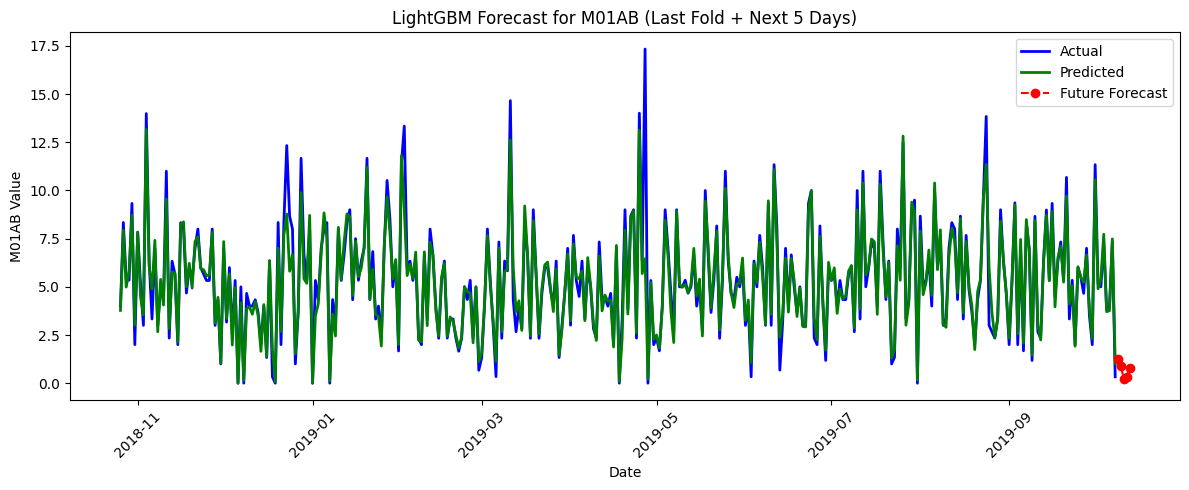


Next 5-Day Forecast:
2019-10-09: 1.24
2019-10-10: 0.88
2019-10-11: 0.23
2019-10-12: 0.33
2019-10-13: 0.78

🔹 Forecasting M01AE with LightGBM (Log1p)...
  - Fold 1/5
  - Fold 2/5
  - Fold 3/5
  - Fold 4/5
  - Fold 5/5
  -> Avg Test Metrics: RMSE=0.77, MAE=0.49, SMAPE=17.11%, MSE=0.65, R2=0.86


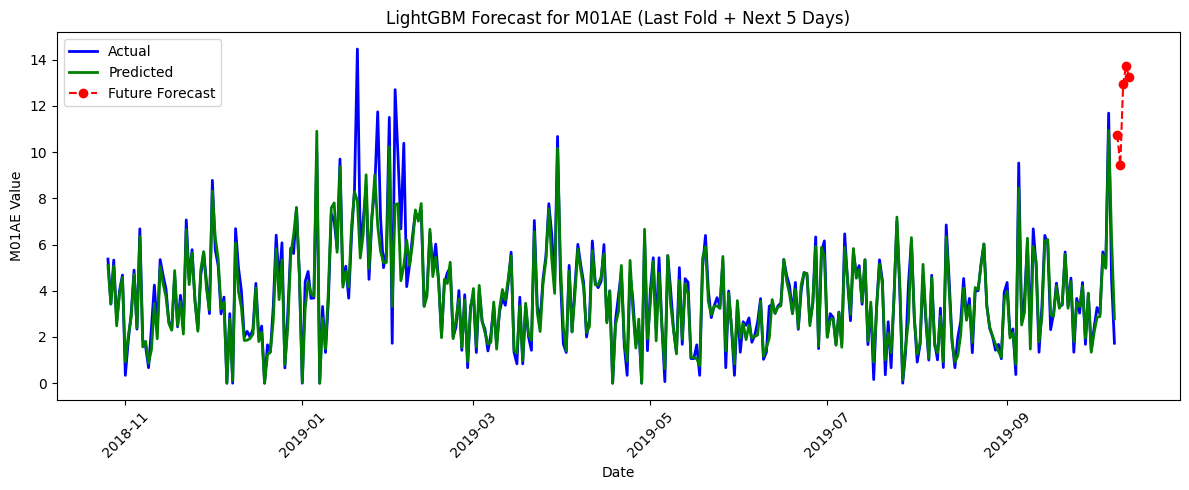


Next 5-Day Forecast:
2019-10-09: 10.76
2019-10-10: 9.43
2019-10-11: 12.93
2019-10-12: 13.75
2019-10-13: 13.24

🔹 Forecasting N02BA with LightGBM (Log1p)...
  - Fold 1/5
  - Fold 2/5
  - Fold 3/5
  - Fold 4/5
  - Fold 5/5
  -> Avg Test Metrics: RMSE=0.70, MAE=0.48, SMAPE=20.68%, MSE=0.57, R2=0.89


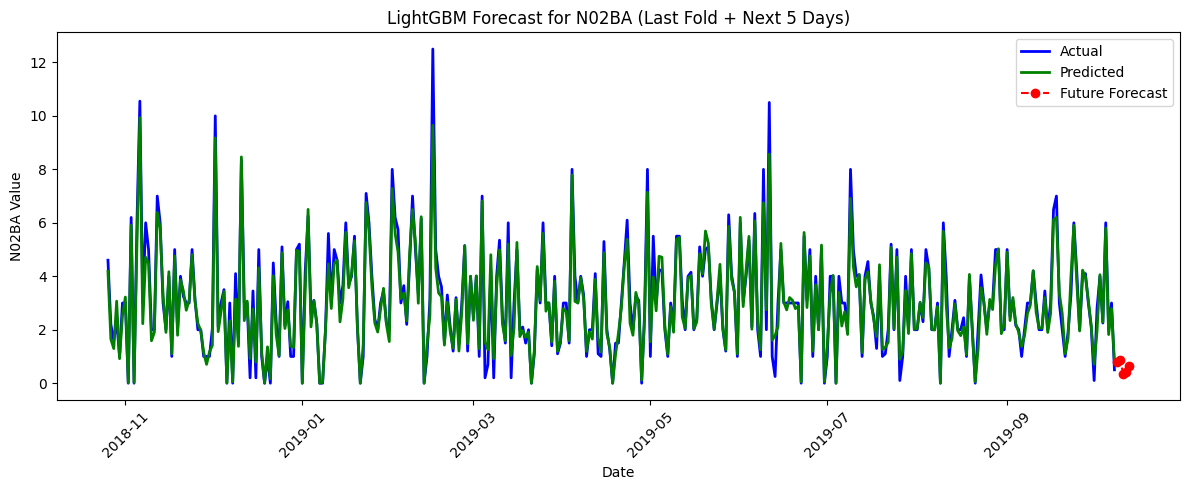


Next 5-Day Forecast:
2019-10-09: 0.77
2019-10-10: 0.85
2019-10-11: 0.36
2019-10-12: 0.42
2019-10-13: 0.64

🔹 Forecasting N02BE with LightGBM (Log1p)...
  - Fold 1/5
  - Fold 2/5
  - Fold 3/5
  - Fold 4/5
  - Fold 5/5
  -> Avg Test Metrics: RMSE=7.58, MAE=4.36, SMAPE=15.97%, MSE=61.50, R2=0.75


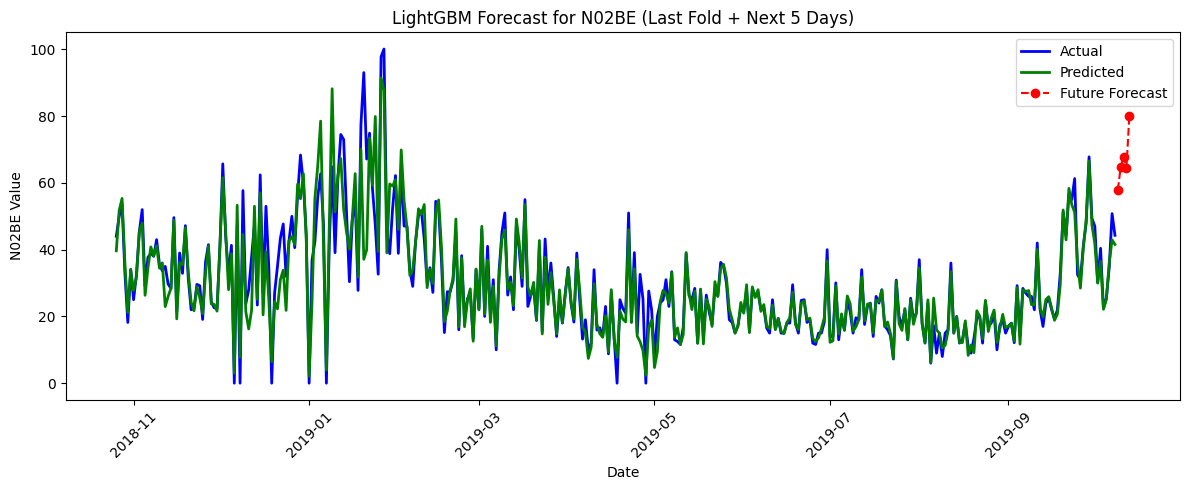


Next 5-Day Forecast:
2019-10-09: 57.91
2019-10-10: 64.80
2019-10-11: 67.90
2019-10-12: 64.60
2019-10-13: 80.13

🔹 Forecasting N05B with LightGBM (Log1p)...
  - Fold 1/5
  - Fold 2/5
  - Fold 3/5
  - Fold 4/5
  - Fold 5/5
  -> Avg Test Metrics: RMSE=1.75, MAE=1.21, SMAPE=20.89%, MSE=3.52, R2=0.88


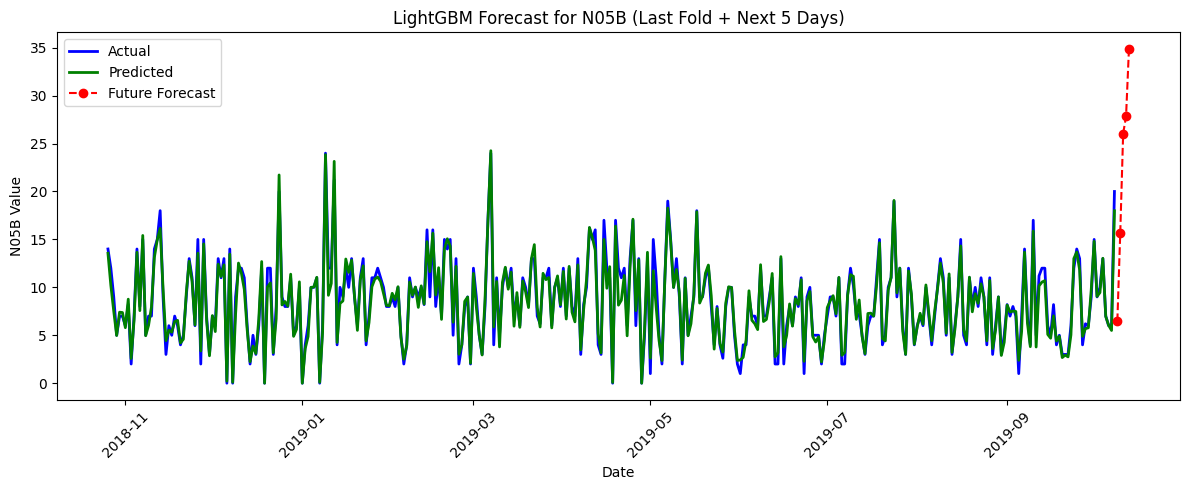


Next 5-Day Forecast:
2019-10-09: 6.47
2019-10-10: 15.67
2019-10-11: 26.04
2019-10-12: 27.85
2019-10-13: 34.86

🔹 Forecasting N05C with LightGBM (Log1p)...
  - Fold 1/5
  - Fold 2/5
  - Fold 3/5
  - Fold 4/5
  - Fold 5/5
  -> Avg Test Metrics: RMSE=0.29, MAE=0.09, SMAPE=72.85%, MSE=0.10, R2=0.92


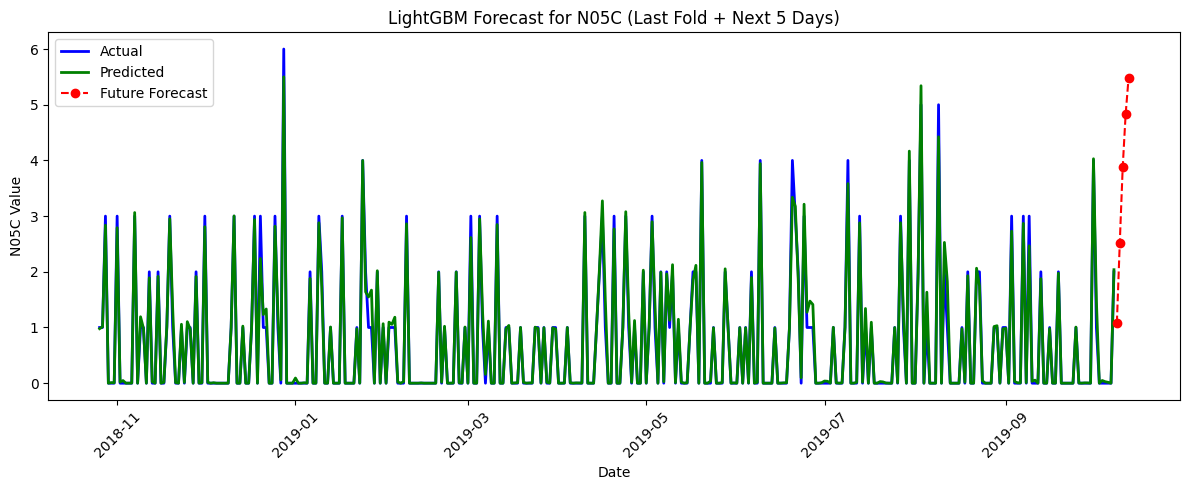


Next 5-Day Forecast:
2019-10-09: 1.08
2019-10-10: 2.52
2019-10-11: 3.88
2019-10-12: 4.83
2019-10-13: 5.48

🔹 Forecasting R03 with LightGBM (Log1p)...
  - Fold 1/5
  - Fold 2/5
  - Fold 3/5
  - Fold 4/5
  - Fold 5/5
  -> Avg Test Metrics: RMSE=2.55, MAE=1.26, SMAPE=43.13%, MSE=6.90, R2=0.84


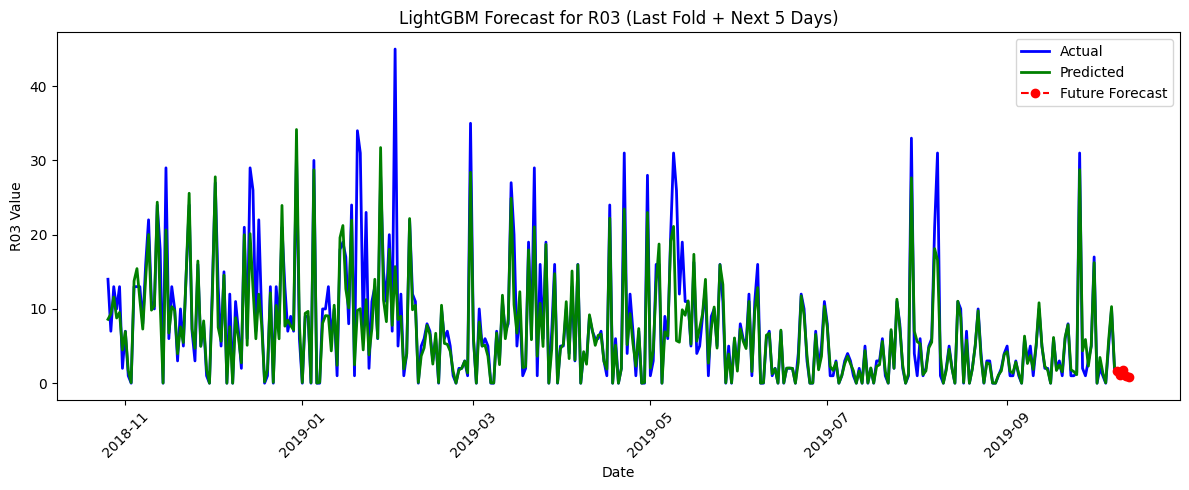


Next 5-Day Forecast:
2019-10-09: 1.58
2019-10-10: 1.12
2019-10-11: 1.78
2019-10-12: 0.97
2019-10-13: 0.81

🔹 Forecasting R06 with LightGBM (Log1p)...
  - Fold 1/5
  - Fold 2/5
  - Fold 3/5
  - Fold 4/5
  - Fold 5/5
  -> Avg Test Metrics: RMSE=0.87, MAE=0.47, SMAPE=24.78%, MSE=0.79, R2=0.86


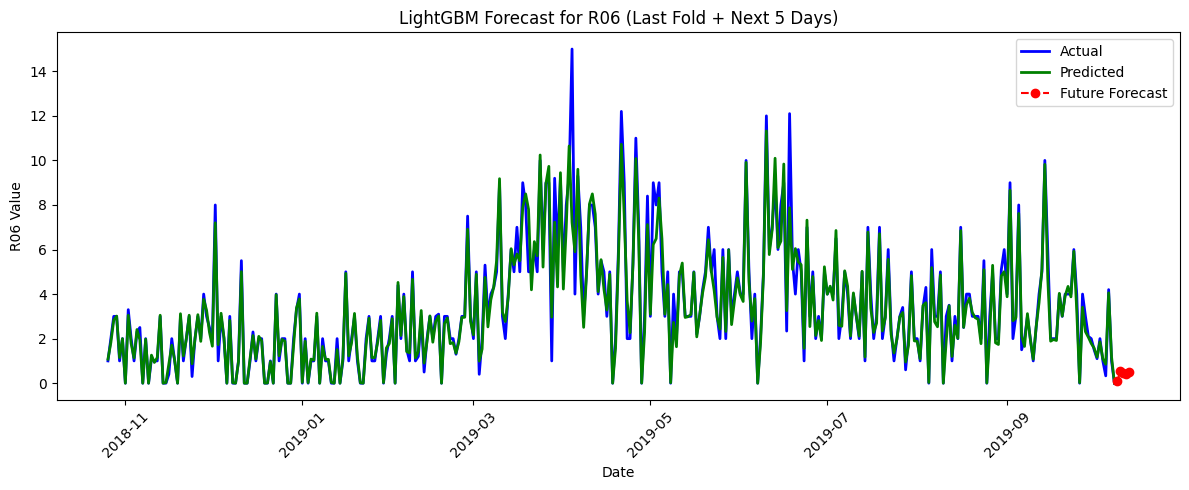


Next 5-Day Forecast:
2019-10-09: 0.08
2019-10-10: 0.55
2019-10-11: 0.45
2019-10-12: 0.42
2019-10-13: 0.50

📊 LightGBM Forecast Accuracy Summary:
           RMSE       MAE      SMAPE        MSE        R2
M01AB  1.010207  0.621781  16.473238   1.161221  0.845098
M01AE  0.771822  0.493021  17.113140   0.654618  0.858146
N02BA  0.703413  0.484751  20.682629   0.566571  0.891236
N02BE  7.576215  4.359757  15.974436  61.502189  0.745705
N05B   1.753622  1.213145  20.885339   3.519460  0.875155
N05C   0.291482  0.089275  72.852900   0.098949  0.924250
R03    2.545320  1.259797  43.130661   6.899859  0.837317
R06    0.873015  0.474585  24.778682   0.793236  0.861135


In [15]:
# =====================
# Run for all drugs
# =====================
results = {}
future_forecasts = {}

for drug in drug_cols:
    drug_name, metrics, forecast, dates = forecast_drug(drug)
    results[drug_name] = metrics
    future_forecasts[drug_name] = pd.Series(forecast, index=dates)

# Display summary metrics
print("\n📊 LightGBM Forecast Accuracy Summary:")
print(pd.DataFrame(results).T)